In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew
from tqdm import tqdm

In [ ]:
df = pd.read_excel('/content/nadi_pulse.xlsx')
new_df = df.head()

In [ ]:
df

,Nadi History ID,Test Status,Dosha Scores,Doctor Comment,Doctor Comment Images,Admin Comment,Created At,Patient Name,Patient Mobile,Patient Age,Text File,Patient User ID,Doctor User ID,Nadi Data
0,"""678e82b2bf4c8598bab231ec""",high_confidence,"{""Kapha"":1,""Pitta"":45,""Vatta"":10}",healthy,https://npulse-backend-live.s3.ap-south-1.amaz...,"Leukocytosis - Not Control, Neutrophilia - Not...",2025-01-20 17:06:58.779,Ranu M,9633665864,19,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""678e6abbbf4c8598bab228a7""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1.28,""HRV"":1,""..."
1,"""678e8179bf4c8598bab2312b""",high_confidence,"{""Kapha"":0,""Pitta"":43,""Vatta"":10}",Typhoid fever may be dengue positive,https://npulse-backend-live.s3.ap-south-1.amaz...,"Lymphocytosis - Under Control, Thrombocytopeni...",2025-01-20 17:01:45.564,Praveen Singh,9632535857,50,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""678e6acbbf4c8598bab228e0""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1.01,""HRV"":1,""..."
2,"""678e7fbebf4c8598bab230fc""",high_confidence,"{""Kapha"":6,""Pitta"":88,""Vatta"":59}",Anemia,https://npulse-backend-live.s3.ap-south-1.amaz...,"Anemia - Not Control, Neutrophilia - Not Contr...",2025-01-20 16:54:22.618,Mst Arbaj,9696482155,11,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""678e6ae1bf4c8598bab2291b""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":2.14,""HRV"":1,""..."
3,"""678e7cc3bf4c8598bab2303e""",high_confidence,"{""Kapha"":1,""Pitta"":1,""Vatta"":10}",Anemia,https://npulse-backend-live.s3.ap-south-1.amaz...,"Anemia - Not Control, Leukopenia - Not Control...",2025-01-20 16:41:39.563,Shiva K,8596322358,21,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""678e6af1bf4c8598bab22956""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1.14,""HRV"":1,""..."
4,"""678e7b64bf4c8598bab22fcc""",high_confidence,"{""Kapha"":4,""Pitta"":64,""Vatta"":17}","Typhoid fever, Anemia",https://npulse-backend-live.s3.ap-south-1.amaz...,"Anemia - Not Control, Leukopenia - Not Control...",2025-01-20 16:35:48.134,Sunil Kumar,9878345375,46,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""678e6b03bf4c8598bab22992""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1.74,""HRV"":1,""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,"""66828af5f2972e82f5db5455""",low_confidence,"{""Kapha"":86,""Pitta"":1,""Vatta"":16}",NaN,NaN,NaN,2024-07-01 10:54:45.288,Gyan prakash,9369705625,50,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""668286f4f2972e82f5db521b""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1,""HRV"":2,""PV""..."
2110,"""66828a82f2972e82f5db544d""",low_confidence,"{""Kapha"":92,""Pitta"":2,""Vatta"":62}",NaN,NaN,NaN,2024-07-01 10:52:50.866,Gyan prakash,9369705625,50,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""668286f4f2972e82f5db521b""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1,""HRV"":2,""PV""..."
2111,"""668289def2972e82f5db543e""",low_confidence,"{""Kapha"":48,""Pitta"":2,""Vatta"":57}",routine checkup platelet down,https://npulse-backend-live.s3.ap-south-1.amaz...,"Anemia - Not Control, Low Platelet Count - Not...",2024-07-01 10:50:06.104,Sadima,7896328888,36,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""668286d9f2972e82f5db51fb""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1.85,""HRV"":1,""..."
2112,"""66828982f2972e82f5db5436""",low_confidence,"{""Kapha"":46,""Pitta"":2,""Vatta"":97}",NaN,NaN,NaN,2024-07-01 10:48:34.520,Sadima,7896328888,36,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""668286d9f2972e82f5db51fb""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1.35,""HRV"":1,""..."


In [ ]:
new_df.columns

Index(['Nadi History ID', 'Test Status', 'Dosha Scores', 'Doctor Comment',
       'Doctor Comment Images', 'Admin Comment', 'Created At', 'Patient Name',
       'Patient Mobile', 'Patient Age', 'Text File', 'Patient User ID',
       'Doctor User ID', 'Nadi Data'],
      dtype='object')

In [ ]:
new_df["Text File"][1]

'https://nadi-textfiles-live.s3.ap-south-1.amazonaws.com/txt/9632535857/1737392504843_r_output_Garima.txt'

In [ ]:
new_df = df[['Patient Age','Admin Comment','Doctor Comment','Text File']]

In [ ]:
def fetch_data(url):
  response = requests.get(url)
  return response.text

In [ ]:
df

,Nadi History ID,Test Status,Dosha Scores,Doctor Comment,Doctor Comment Images,Admin Comment,Created At,Patient Name,Patient Mobile,Patient Age,Text File,Patient User ID,Doctor User ID,Nadi Data
0,"""678e82b2bf4c8598bab231ec""",high_confidence,"{""Kapha"":1,""Pitta"":45,""Vatta"":10}",healthy,https://npulse-backend-live.s3.ap-south-1.amaz...,"Leukocytosis - Not Control, Neutrophilia - Not...",2025-01-20 17:06:58.779,Ranu M,9633665864,19,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""678e6abbbf4c8598bab228a7""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1.28,""HRV"":1,""..."
1,"""678e8179bf4c8598bab2312b""",high_confidence,"{""Kapha"":0,""Pitta"":43,""Vatta"":10}",Typhoid fever may be dengue positive,https://npulse-backend-live.s3.ap-south-1.amaz...,"Lymphocytosis - Under Control, Thrombocytopeni...",2025-01-20 17:01:45.564,Praveen Singh,9632535857,50,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""678e6acbbf4c8598bab228e0""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1.01,""HRV"":1,""..."
2,"""678e7fbebf4c8598bab230fc""",high_confidence,"{""Kapha"":6,""Pitta"":88,""Vatta"":59}",Anemia,https://npulse-backend-live.s3.ap-south-1.amaz...,"Anemia - Not Control, Neutrophilia - Not Contr...",2025-01-20 16:54:22.618,Mst Arbaj,9696482155,11,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""678e6ae1bf4c8598bab2291b""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":2.14,""HRV"":1,""..."
3,"""678e7cc3bf4c8598bab2303e""",high_confidence,"{""Kapha"":1,""Pitta"":1,""Vatta"":10}",Anemia,https://npulse-backend-live.s3.ap-south-1.amaz...,"Anemia - Not Control, Leukopenia - Not Control...",2025-01-20 16:41:39.563,Shiva K,8596322358,21,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""678e6af1bf4c8598bab22956""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1.14,""HRV"":1,""..."
4,"""678e7b64bf4c8598bab22fcc""",high_confidence,"{""Kapha"":4,""Pitta"":64,""Vatta"":17}","Typhoid fever, Anemia",https://npulse-backend-live.s3.ap-south-1.amaz...,"Anemia - Not Control, Leukopenia - Not Control...",2025-01-20 16:35:48.134,Sunil Kumar,9878345375,46,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""678e6b03bf4c8598bab22992""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1.74,""HRV"":1,""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,"""66828af5f2972e82f5db5455""",low_confidence,"{""Kapha"":86,""Pitta"":1,""Vatta"":16}",NaN,NaN,NaN,2024-07-01 10:54:45.288,Gyan prakash,9369705625,50,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""668286f4f2972e82f5db521b""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1,""HRV"":2,""PV""..."
2110,"""66828a82f2972e82f5db544d""",low_confidence,"{""Kapha"":92,""Pitta"":2,""Vatta"":62}",NaN,NaN,NaN,2024-07-01 10:52:50.866,Gyan prakash,9369705625,50,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""668286f4f2972e82f5db521b""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1,""HRV"":2,""PV""..."
2111,"""668289def2972e82f5db543e""",low_confidence,"{""Kapha"":48,""Pitta"":2,""Vatta"":57}",routine checkup platelet down,https://npulse-backend-live.s3.ap-south-1.amaz...,"Anemia - Not Control, Low Platelet Count - Not...",2024-07-01 10:50:06.104,Sadima,7896328888,36,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""668286d9f2972e82f5db51fb""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1.85,""HRV"":1,""..."
2112,"""66828982f2972e82f5db5436""",low_confidence,"{""Kapha"":46,""Pitta"":2,""Vatta"":97}",NaN,NaN,NaN,2024-07-01 10:48:34.520,Sadima,7896328888,36,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""668286d9f2972e82f5db51fb""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1.35,""HRV"":1,""..."


In [ ]:
print(df['Doctor Comment'][71]," admin  ",
df['Admin Comment'][71])

healthy  admin   Diabetes - Under Control


In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
df['Admin Comment'].value_counts()

,count
Admin Comment,
Diabetes - Under Control,98
"Anemia - Not Control, Leukopenia - Not Control, Thrombocytopenia - Not Control",44
"Anemia - Not Control, Low Platelet Count - Not Control",43
Diabetes - Not Control,26
"Anemia - Under Control, Infection - Under Control, Leukemia - Not Control",22
...,...
"Anemia - Not Control, Leukopenia - Not Control, Hypoalbuminemia - Not Control, Hyperbilirubinemia - Not Control, Liver Dysfunction - Not Control",1
"Leukopenia - Not Control, Thrombocytopenia - Not Control, Hypoalbuminemia - Not Control, Liver Dysfunction - Not Control",1
"Anemia - Not Control, Lymphocytosis - Under Control",1


In [ ]:
a_l = df[df['Admin Comment'] == 'Anemia - Not Control, Leukopenia - Not Control, Thrombocytopenia - Not Control']
a_p = df[df['Admin Comment'] == 'Anemia - Not Control, Low Platelet Count - Not Control']
a_i = df[df['Admin Comment'] == 'Anemia - Under Control, Infection - Under Control, Leukemia - Not Control']

In [ ]:
a_df = pd.concat([a_l,a_p,a_i])

In [ ]:
duc = df[df['Admin Comment'] == 'Diabetes - Under Control']

In [ ]:
dnc = df[df['Admin Comment'] == 'Diabetes - Not Control']
dnc.shape

(26, 14)

In [ ]:
d_df = pd.concat([duc,dnc])

In [ ]:
final_df = pd.concat([a_df,d_df])

In [ ]:
pd.set_option('display.max_rows', 50)
d_df[['Admin Comment','Doctor Comment']]

,Admin Comment,Doctor Comment
65,Diabetes - Under Control,healthy
70,Diabetes - Under Control,healthy
71,Diabetes - Under Control,healthy
72,Diabetes - Under Control,healthy
74,Diabetes - Under Control,healthy
...,...,...
1569,Diabetes - Not Control,diabetic patient
1609,Diabetes - Not Control,diabetic patient
1633,Diabetes - Not Control,diabetic patient
1636,Diabetes - Not Control,diabetic patient


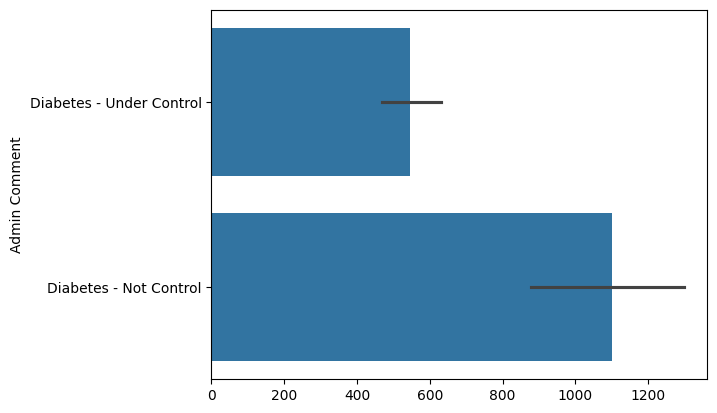

In [ ]:
sns.barplot(d_df['Admin Comment'])
plt.show()

In [ ]:
final_df.reset_index(inplace=True)

In [ ]:
final_df.head()

,index,Nadi History ID,Test Status,Dosha Scores,Doctor Comment,Doctor Comment Images,Admin Comment,Created At,Patient Name,Patient Mobile,Patient Age,Text File,Patient User ID,Doctor User ID,Nadi Data
0,127,"""677c1a70baaecf577a8ad9d2""",high_confidence,"{""Kapha"":44,""Pitta"":45,""Vatta"":58}",Anemia,https://npulse-backend-live.s3.ap-south-1.amaz...,"Anemia - Not Control, Leukopenia - Not Control...",2025-01-06 18:01:20.294,Mamta Devi,9369545645,60,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""677c06e4baaecf577a8ad46e""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1.42,""HRV"":2,""..."
1,146,"""677ac3a2baaecf577a8acbbd""",high_confidence,"{""Kapha"":44,""Pitta"":0,""Vatta"":38}","Anemia, Typhoid fever",https://npulse-backend-live.s3.ap-south-1.amaz...,"Anemia - Not Control, Leukopenia - Not Control...",2025-01-05 17:38:42.027,Bharat K,8593156484,45,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""677ab3a6baaecf577a8ac83f""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1,""HRV"":1,""PV""..."
2,178,"""67757912baaecf577a8aa315""",high_confidence,"{""Kapha"":23,""Pitta"":87,""Vatta"":17}","Anemia, Typhoid fever",https://npulse-backend-live.s3.ap-south-1.amaz...,"Anemia - Not Control, Leukopenia - Not Control...",2025-01-01 17:19:14.505,Vaishnavi K,8593215685,20,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""67756bbfbaaecf577a8a9d41""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1.27,""HRV"":1,""..."
3,246,"""6764526f30a755a30867a57e""",high_confidence,"{""Kapha"":1,""Pitta"":0,""Vatta"":16}","Cold cough, Fever",https://npulse-backend-live.s3.ap-south-1.amaz...,"Anemia - Not Control, Leukopenia - Not Control...",2024-12-19 17:05:51.050,Shanti Devi,8596216648,45,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""6764453430a755a308679f54""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1.12,""HRV"":1,""..."
4,293,"""675b19ba902a86a94ad19d73""",high_confidence,"{""Kapha"":22,""Pitta"":4,""Vatta"":74}","Anemia, Iron deficiency",https://npulse-backend-live.s3.ap-south-1.amaz...,"Anemia - Not Control, Leukopenia - Not Control...",2024-12-12 17:13:30.474,Geeta K,8593259488,64,https://nadi-textfiles-live.s3.ap-south-1.amaz...,"""675b1067902a86a94ad1998a""","""65f92fd43711d61bd7bbf889""","{""nadiCheckData"":{""Kapha"":{""HR"":1.08,""HRV"":1,""..."


In [ ]:
final_df.columns

Index(['index', 'Nadi History ID', 'Test Status', 'Dosha Scores',
       'Doctor Comment', 'Doctor Comment Images', 'Admin Comment',
       'Created At', 'Patient Name', 'Patient Mobile', 'Patient Age',
       'Text File', 'Patient User ID', 'Doctor User ID', 'Nadi Data'],
      dtype='object')

In [ ]:
final_df = final_df.sample(frac=1, random_state=42)

In [ ]:
final_df = final_df[['Patient Age','Admin Comment','Doctor Comment','Text File']]

In [ ]:
final_df.shape

(233, 4)

In [ ]:
final_df.head()

,Patient Age,Admin Comment,Doctor Comment,Text File
84,40,"Anemia - Not Control, Low Platelet Count - Not...",; healthy,https://nadi-textfiles-live.s3.ap-south-1.amaz...
216,43,Diabetes - Not Control,; daibatic patient,https://nadi-textfiles-live.s3.ap-south-1.amaz...
231,67,Diabetes - Not Control,diabetic patient,https://nadi-textfiles-live.s3.ap-south-1.amaz...
9,45,"Anemia - Not Control, Leukopenia - Not Control...","Dengue fever, Fever, Anemia",https://nadi-textfiles-live.s3.ap-south-1.amaz...
126,72,Diabetes - Under Control,healthy,https://nadi-textfiles-live.s3.ap-south-1.amaz...


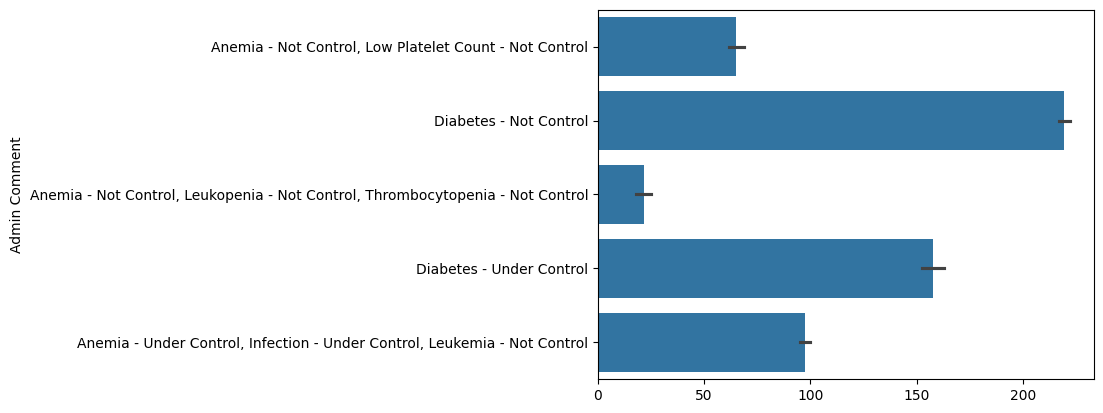

In [ ]:
sns.barplot(final_df['Admin Comment'])
plt.show()

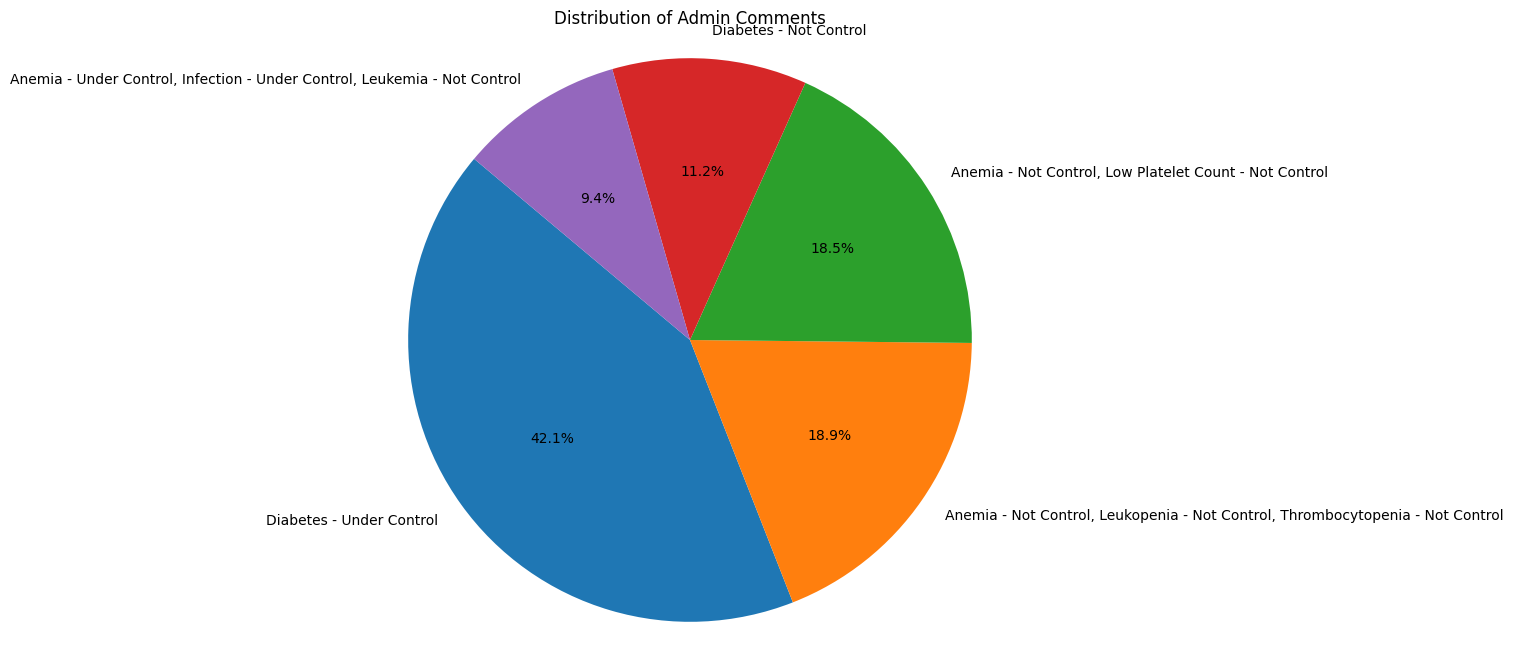

In [ ]:
admin_counts = final_df['Admin Comment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(admin_counts, labels=admin_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Admin Comments')
plt.axis('equal')
plt.show()


In [ ]:
final_df["Nadi Data"] = final_df["Text File"].apply(fetch_data)

In [ ]:
final_df = final_df.drop(columns=['Text File','Doctor Comment'])

In [ ]:
df = final_df
df.head()

,Patient Age,Admin Comment,Nadi Data
84,40,"Anemia - Not Control, Low Platelet Count - Not...","Start nPULSE001\n1742,0,879\n1414,0,762\n1754,..."
216,43,Diabetes - Not Control,"Start nPULSE001\n2796,1170,1612\n2820,929,1621..."
231,67,Diabetes - Not Control,"Start\n476,0,447\n476,0,447\n476,0,447\n370,0,..."
9,45,"Anemia - Not Control, Leukopenia - Not Control...","Start nPULSE001\n2905,1000,1078\n2688,677,1153..."
126,72,Diabetes - Under Control,Start nPULSE001\nStart nPULSE001\nStart nPULSE...


In [ ]:
df.shape

(233, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 84 to 102
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Patient Age    233 non-null    int64 
 1   Admin Comment  233 non-null    object
 2   Nadi Data      233 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.3+ KB


In [ ]:
df.isnull().sum()

,0
Patient Age,0
Admin Comment,0
Nadi Data,0


In [ ]:
df.describe()

,Patient Age
count,233.000000
mean,45.287554
std,18.580177
min,9.000000
25%,29.000000
50%,45.000000
75%,62.000000
max,75.000000


In [ ]:
# Container for final features
feature_rows = []

for idx, row in tqdm(df.iterrows(), total=len(df)):
    try:
        nadi_raw = row["Nadi Data"]
        age = row.get("Patient Age", np.nan)
        label = row.get("Admin Comment", "Unknown")

        if pd.isna(nadi_raw):
            continue

        # Parse lines
        lines = nadi_raw.strip().split('\n')
        pulse_data_lines = [line for line in lines if ',' in line]

        # Extract 3D pulse data
        cleaned_pulse_data = []
        for line in pulse_data_lines:
            values = [int(val) for val in line.strip().split(',') if val.strip().isdigit()]
            if len(values) == 3:
                cleaned_pulse_data.append(values)

        if not cleaned_pulse_data:
            continue

        pulse_array = np.array(cleaned_pulse_data)

        # Feature extraction per channel (ch1, ch2, ch3)
        features = {}
        for i in range(3):
            col = pulse_array[:, i]
            features[f'ch{i+1}_mean'] = np.mean(col)
            features[f'ch{i+1}_std'] = np.std(col)
            features[f'ch{i+1}_min'] = np.min(col)
            features[f'ch{i+1}_max'] = np.max(col)
            features[f'ch{i+1}_skew'] = skew(col)

        # Add age and label
        features["age"] = age
        features["label"] = label

        # Add to list
        feature_rows.append(features)

    except Exception as e:
        print(f"Skipping row {idx} due to error: {e}")
        continue


100%|██████████| 233/233 [00:09<00:00, 24.28it/s]


In [ ]:
# Convert to DataFrame
features_df = pd.DataFrame(feature_rows)

# Preview it
features_df.head()

,ch1_mean,ch1_std,ch1_min,ch1_max,ch1_skew,ch2_mean,ch2_std,ch2_min,ch2_max,ch2_skew,ch3_mean,ch3_std,ch3_min,ch3_max,ch3_skew,age,label
0,1405.160458,495.879713,0,2478,-1.413724,488.438395,120.852689,0,1295,0.221893,771.432496,169.495896,0,1641,-0.023424,40,"Anemia - Not Control, Low Platelet Count - Not..."
1,2154.615412,210.901144,1076,4036,2.792905,975.252408,85.242944,21,1848,0.266817,1294.491081,162.470100,259,2719,1.951978,43,Diabetes - Not Control
2,447.924384,81.752873,0,1219,0.702067,1246.895595,75.855129,0,1767,-3.782732,481.650884,79.423580,0,1275,1.030608,67,Diabetes - Not Control
3,3068.929855,176.615451,1798,4188,0.971406,1020.510033,82.713004,0,1959,-0.120049,1162.232769,143.859425,0,2459,0.315999,45,"Anemia - Not Control, Leukopenia - Not Control..."
4,3975.278537,154.365705,2737,4938,-0.814154,1101.064764,105.107599,0,2227,-0.559629,1404.655844,140.193085,0,2339,-0.562000,72,Diabetes - Under Control


In [ ]:
features_df.shape

(217, 17)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.model_selection import cross_val_score, StratifiedKFold,RandomizedSearchCV

In [ ]:
features_df = pd.read_csv('/content/processed_nadi_features.csv')
features_df.head()

,ch1_mean,ch1_std,ch1_min,ch1_max,ch1_skew,ch2_mean,ch2_std,ch2_min,ch2_max,ch2_skew,ch3_mean,ch3_std,ch3_min,ch3_max,ch3_skew,age,label
0,1405.160458,495.879713,0,2478,-1.413724,488.438395,120.852689,0,1295,0.221893,771.432496,169.495896,0,1641,-0.023424,40,"Anemia - Not Control, Low Platelet Count - Not..."
1,2154.615412,210.901144,1076,4036,2.792905,975.252408,85.242944,21,1848,0.266817,1294.491081,162.470100,259,2719,1.951978,43,Diabetes - Not Control
2,447.924384,81.752873,0,1219,0.702067,1246.895595,75.855129,0,1767,-3.782732,481.650884,79.423580,0,1275,1.030608,67,Diabetes - Not Control
3,3068.929855,176.615451,1798,4188,0.971406,1020.510033,82.713004,0,1959,-0.120049,1162.232769,143.859425,0,2459,0.315999,45,"Anemia - Not Control, Leukopenia - Not Control..."
4,3975.278537,154.365705,2737,4938,-0.814154,1101.064764,105.107599,0,2227,-0.559629,1404.655844,140.193085,0,2339,-0.562000,72,Diabetes - Under Control


In [ ]:
features_df['label'].value_counts()

,count
label,
Diabetes - Under Control,96
"Anemia - Not Control, Low Platelet Count - Not Control",40
"Anemia - Not Control, Leukopenia - Not Control, Thrombocytopenia - Not Control",38
Diabetes - Not Control,22
"Anemia - Under Control, Infection - Under Control, Leukemia - Not Control",21


In [ ]:
features_df['label'] = features_df['label'].replace('Anemia - Not Control, Low Platelet Count - Not Control', 'Anemia')
features_df['label'] = features_df['label'].replace('Anemia - Not Control, Leukopenia - Not Control, Thrombocytopenia - Not Control', 'Anemia')
features_df['label'] = features_df['label'].replace('Anemia - Under Control, Infection - Under Control, Leukemia - Not Control', 'Anemia')

In [ ]:
features_df['label'].value_counts()

,count
label,
Anemia,99
Diabetes - Under Control,96
Diabetes - Not Control,22


In [ ]:
la = LabelEncoder()
features_df['label'] = la.fit_transform(features_df['label'])

In [ ]:
x = features_df.drop(columns=['label'])
y = features_df['label']

In [ ]:
x.columns

Index(['ch1_mean', 'ch1_std', 'ch1_min', 'ch1_max', 'ch1_skew', 'ch2_mean',
       'ch2_std', 'ch2_min', 'ch2_max', 'ch2_skew', 'ch3_mean', 'ch3_std',
       'ch3_min', 'ch3_max', 'ch3_skew', 'age'],
      dtype='object')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss'
)

In [ ]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.8],
    'bootstrap': [True, False]
}

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations
    cv=5,       # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)


In [ ]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2', 0.8],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [ ]:
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': True}


In [ ]:
clf = RandomForestClassifier(
    max_features=0.3,  # Consider fewer features per split
    n_estimators=500,  # More trees compensate for randomness
    max_depth=15,      # Prevent overly complex trees
    min_samples_split=5,
    random_state=42
)

In [ ]:
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, max_features=0.3, min_samples_split=5,
                       n_estimators=500, random_state=42)

In [ ]:
clf.score(x_train,y_train)

0.9884393063583815

In [ ]:
clf.score(x_test,y_test)

0.5909090909090909

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
classification_report(y_test,y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.62      0.50      0.56        20\n           1       0.00      0.00      0.00         4\n           2       0.57      0.80      0.67        20\n\n    accuracy                           0.59        44\n   macro avg       0.40      0.43      0.41        44\nweighted avg       0.54      0.59      0.56        44\n'

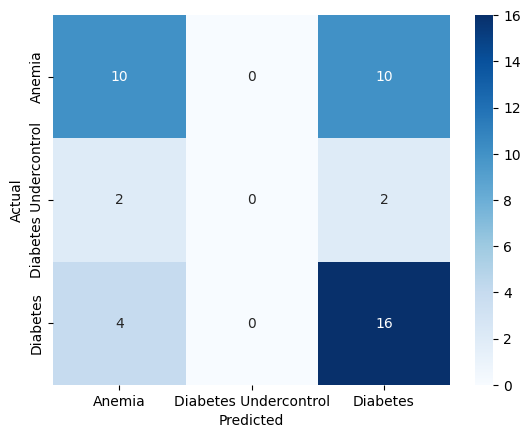

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Anemia", "Diabetes Undercontrol","Diabetes"], yticklabels=["Anemia", "Diabetes Undercontrol","Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [7]:
features_df = pd.read_csv('/content/processed_nadi_features.csv')
features_df.head()

,ch1_mean,ch1_std,ch1_min,ch1_max,ch1_skew,ch2_mean,ch2_std,ch2_min,ch2_max,ch2_skew,ch3_mean,ch3_std,ch3_min,ch3_max,ch3_skew,age,label
0,1405.160458,495.879713,0,2478,-1.413724,488.438395,120.852689,0,1295,0.221893,771.432496,169.495896,0,1641,-0.023424,40,"Anemia - Not Control, Low Platelet Count - Not..."
1,2154.615412,210.901144,1076,4036,2.792905,975.252408,85.242944,21,1848,0.266817,1294.491081,162.470100,259,2719,1.951978,43,Diabetes - Not Control
2,447.924384,81.752873,0,1219,0.702067,1246.895595,75.855129,0,1767,-3.782732,481.650884,79.423580,0,1275,1.030608,67,Diabetes - Not Control
3,3068.929855,176.615451,1798,4188,0.971406,1020.510033,82.713004,0,1959,-0.120049,1162.232769,143.859425,0,2459,0.315999,45,"Anemia - Not Control, Leukopenia - Not Control..."
4,3975.278537,154.365705,2737,4938,-0.814154,1101.064764,105.107599,0,2227,-0.559629,1404.655844,140.193085,0,2339,-0.562000,72,Diabetes - Under Control


In [ ]:
y

,label
0,0
1,1
2,1
3,0
4,2
...,...
212,0
213,0
214,0
215,2


In [ ]:
clf.predict([[1405.160458,495.879713,0,2478,-1.413724,488.438395,120.852689,0,1295,0.221893,771.432496,169.495896,0,1641,-0.023424,40]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
import pickle

pickle.dump(clf,open('Nadi_Diabetes_Model.pkl','wb'))

In [1]:
import pandas as pd


In [3]:
df = pd.read_excel("/content/Nadi diabetes df.xlsx")
df.head()

,Patient Age,Admin Comment,Doctor Comment,Text File
0,40,"Anemia - Not Control, Low Platelet Count - Not...",; healthy,https://nadi-textfiles-live.s3.ap-south-1.amaz...
1,43,Diabetes - Not Control,; daibatic patient,https://nadi-textfiles-live.s3.ap-south-1.amaz...
2,67,Diabetes - Not Control,diabetic patient,https://nadi-textfiles-live.s3.ap-south-1.amaz...
3,45,"Anemia - Not Control, Leukopenia - Not Control...","Dengue fever, Fever, Anemia",https://nadi-textfiles-live.s3.ap-south-1.amaz...
4,72,Diabetes - Under Control,healthy,https://nadi-textfiles-live.s3.ap-south-1.amaz...


In [10]:
df['Text File'][4]

'https://nadi-textfiles-live.s3.ap-south-1.amazonaws.com/txt/7893216588/1732812918263_l_output_Garima.txt'

In [11]:
df['Admin Comment'][4]

'Diabetes - Under Control'